## Load data and GLAM structure (More & Less). Excluded participants removed from GLAM analysis

Used binned data for simulation.

In [17]:
data = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_More_NoBin_33.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]

data2 = pd.read_csv(str('data/PF2019_data/GlamDataPF2019_Less_Inv_NoBin_33.csv'))
# Subset only necessary columns
data2 = data2[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data2.subject.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33])

In [18]:
len(data2.subject.unique())

32

## * Since subject 31 is eliminated for this analysis we need to take out from the other dataframe

In [19]:
# Load data for PF2019 study 

# Like condition 

data_all0 = pd.read_csv('data/PF2019_data/DataPerceptualFramingNotebook_v1.csv')
data_all0 = data_all0.drop(['Unnamed: 0'], axis=1)

# Take out participant 31
data_all0 = data_all0.loc[data_all0['Part'] != 31]

data_all0=data_all0.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})

In [20]:
data_all0.Part.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33])

In [21]:
len(data_all0.Part.unique())

32

In [22]:
data_all0["zGSF"] = z_score1(data_all0,'Part',"GSF")
data_all0["zDDT"] = z_score1(data_all0,'Part',"DDT")
data_all0["AbsDDT"] = abs(data_all0["DDT"])
data_all0["zAbsDDT"] = z_score1(data_all0,'Part',"AbsDDT")

data_all0["TotVal"] = data_all0['LVal']+ data_all0['RVal']
data_all0["zTotVal"] = z_score1(data_all0,'Part',"TotVal")

data_all0["ChosenVal"] = data_all0['RVal']*data_all0['Choice']+ data_all0['LVal']*(1-data_all0['Choice'])
data_all0["UnchosenVal"] = data_all0['LVal']*data_all0['Choice']+ data_all0['RVal']*(1-data_all0['Choice'])
data_all0["zChosenVal"] = z_score1(data_all0,'Part',"ChosenVal")
data_all0["zUnchosenVal"] = z_score1(data_all0,'Part',"UnchosenVal")

# Change so everything is equal
data_all0 = data_all0.replace('NEXTLESS', 'MORE')
data_all0 = data_all0.replace('NEXTMORE', 'LESS')
data_all0['BlockCond'].unique()

# Change so everything is equal
data_all0 = data_all0.replace('MORE', 1)
data_all0 = data_all0.replace('LESS', 2)
data_all0['BlockCond'].unique()

# Add corrects
Correct = []
for i in range(len(data_all0)):
    if data_all0.BlockCond[i] == 1:
        if (data_all0.Choice[i] == 1 and (data_all0.LVal[i] < data_all0.RVal[i])) or (data_all0.Choice[i] == 0 and (data_all0.LVal[i] > data_all0.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_all0.BlockCond[i] == 2:
        if (data_all0.Choice[i] == 1 and (data_all0.LVal[i] > data_all0.RVal[i])) or (data_all0.Choice[i] == 0 and (data_all0.LVal[i] < data_all0.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_all0["Correct"] = Correct

# Add Splits
data_splits = splitBy(data_all0, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'GSF','DDT'])

data_all0['ConfSplit'] = data_splits['ConfSplit'].values
data_all0['GSFSplit'] = data_splits['GSFMedSplit'].values
data_all0['DDTSplit'] = data_splits['DDTMedSplit'].values

## Remove extra participants taken out from GLAM

In [23]:
for i in [1,13,16,20,31]:
    data_all0 = data_all0.loc[data_all0['Part'] != i]
    data = data.loc[data['subject'] != i]
    data2 = data2.loc[data2['subject'] != i]
    
print (data_all0["Part"].unique())
print (data["subject"].unique())
print (data2["subject"].unique())
               
print ('Number of participants: ' + str(len(data_all0["Part"].unique())))
print ('Number of participants: ' + str(len(data["subject"].unique())))
print ('Number of participants: ' + str(len(data2["subject"].unique())))

[ 2  3  4  5  6  7  8  9 10 11 12 14 15 17 18 19 21 22 23 24 25 26 27 28
 29 30 32 33]
[ 2  3  4  5  6  7  8  9 10 11 12 14 15 17 18 19 21 22 23 24 25 26 27 28
 29 30 32 33]
[ 2  3  4  5  6  7  8  9 10 11 12 14 15 17 18 19 21 22 23 24 25 26 27 28
 29 30 32 33]
Number of participants: 28
Number of participants: 28
Number of participants: 28


In [24]:
data_all = data_all0.loc[data_all0['BlockCond'] == 1]   # MORE
data_all2 = data_all0.loc[data_all0['BlockCond'] == 2] # LESS

## Load Simulations

In [25]:
sufix = '_individual_More_NoBin_excludedTrial_Gamma-11_NUTS_32_exclGLAM'
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations'+sufix+'.csv')):  
        data_simulation_more = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations'+sufix+'.csv'))
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations_NoGaze'+sufix+'.csv')):  
        data_simulation_more_nobias = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations_NoGaze'+sufix+'.csv'))        

In [26]:
sufix = '_individual_Less_Inv_NoBin_excludedTrial_Gamma-11_NUTS_32_exclGLAM'
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations'+sufix+'.csv')):  
        data_simulation_less = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations'+sufix+'.csv'))
if os.path.exists(str('results/simulations_evidence/DEvidence_simulations_NoGaze'+sufix+'.csv')):  
        data_simulation_less_nobias = pd.read_csv(str('results/simulations_evidence/DEvidence_simulations_NoGaze'+sufix+'.csv'))

## Invert the values for dislike

In [27]:
data_simulation_less['TotVal_orig'] = np.max(data_simulation_less['TotVal'].unique()) - data_simulation_less['TotVal'] +np.min(data_simulation_less['TotVal'].unique())
data_simulation_less["zTotVal_orig"] = z_score1(data_simulation_less,'Part',"TotVal_orig")

data_simulation_less_nobias['TotVal_orig'] = np.max(data_simulation_less_nobias['TotVal'].unique()) - data_simulation_less_nobias['TotVal'] +np.min(data_simulation_less_nobias['TotVal'].unique())
data_simulation_less_nobias["zTotVal_orig"] = z_score1(data_simulation_less_nobias,'Part',"TotVal_orig")

## For MORE frame

In [28]:
%%R -i data_simulation_more  -i data_all -i data_simulation_more_nobias

d_sim <- data_simulation_more
d_sim_nobias <- data_simulation_more_nobias
d_hum <- data_all

BIC: 93945.03  BIC: 93550.28  BIC: 93550.28
Call:  glm(formula = zConf ~ zAbsDVal + zTotVal + zRT, data = d_hum)

Coefficients:
(Intercept)     zAbsDVal      zTotVal          zRT  
    0.12630      0.09359      0.04037     -0.31423  

Degrees of Freedom: 3359 Total (i.e. Null);  3356 Residual
Null Deviance:	    3050 
Residual Deviance: 2632 	AIC: 8725


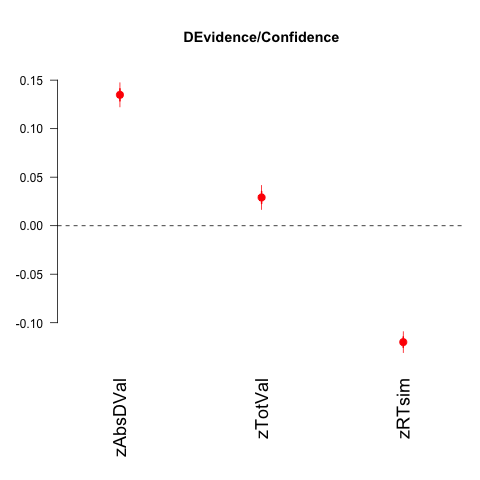

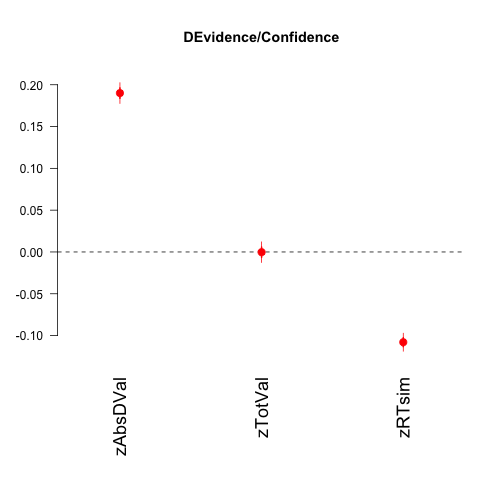

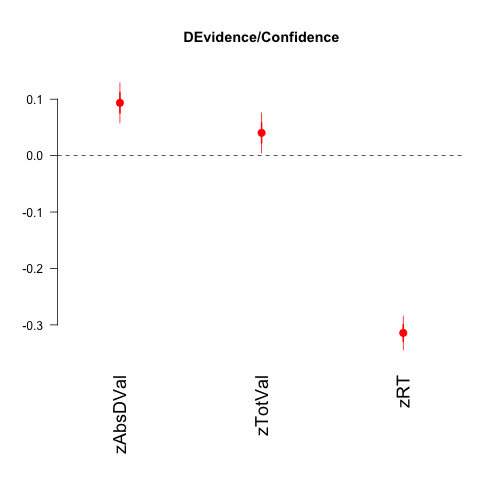

In [29]:
%%R    
title_plot = "DEvidence/Confidence"
ModelDev <- glm(zAbsDEv ~ zAbsDVal + zTotVal + zRTsim  , data= d_sim)
coefplot(ModelDev,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelDev_nobias <- glm(zAbsDEv ~ zAbsDVal + zTotVal + zRTsim  , data= d_sim_nobias)
coefplot(ModelDev_nobias,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelConf <- glm(zConf ~ zAbsDVal + zTotVal + zRT  , data= d_hum)
coefplot(ModelConf,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

BIC1choice = BIC(ModelDev)
cat("BIC:" , BIC1choice," ")
ModelDev

BIC1choice = BIC(ModelDev_nobias)
cat("BIC:" , BIC1choice," ")
ModelDev_nobias

IC1choice = BIC(ModelConf)
cat("BIC:" , BIC1choice)
ModelConf

In [30]:
%%R
summary(ModelDev_nobias)$coefficients

                 Estimate  Std. Error       t value      Pr(>|t|)
(Intercept) -3.758441e-16 0.005307269 -7.081686e-14  1.000000e+00
zAbsDVal     1.900226e-01 0.006187540  3.071052e+01 2.771540e-204
zTotVal     -2.523770e-04 0.006134624 -4.113976e-02  9.671847e-01
zRTsim      -1.079506e-01 0.005364908 -2.012161e+01  1.610510e-89


In [31]:
%%R
summary(ModelDev)$coefficients

                 Estimate  Std. Error      t value      Pr(>|t|)
(Intercept)  6.220961e-05 0.005341554   0.01164635  9.907078e-01
zAbsDVal     1.348700e-01 0.006198765  21.75756327 3.079597e-104
zTotVal      2.909309e-02 0.006175996   4.71067268  2.478872e-06
zRTsim      -1.200082e-01 0.005381044 -22.30202062 2.203508e-109


In [32]:
%%R    
# Extract Coefficients
ModelDev_Coef = summary(ModelDev)$coefficients[2:4,1]
ModelDev_nobias_Coef = summary(ModelDev_nobias)$coefficients[2:4,1]
ModelConf_Coef = summary(ModelConf)$coefficients[2:4,1]

# Extract Standard Error
ModelDev_SE = summary(ModelDev)$coefficients[2:4,2]
ModelDev_nobias_SE = summary(ModelDev_nobias)$coefficients[2:4,2]
ModelConf_SE = summary(ModelConf)$coefficients[2:4,2]

# Extract p-value
ModelDev_p = summary(ModelDev)$coefficients[2:4,4]
ModelDev_nobias_p = summary(ModelDev_nobias)$coefficients[2:4,4]
ModelConf_p = summary(ModelConf)$coefficients[2:4,4]

In [33]:
%R -o ModelDev_Coef  -o ModelDev_nobias_Coef -o ModelConf_Coef 
ModelDev_Coefs = ModelDev_Coef
ModelDev_nobias_Coefs = ModelDev_nobias_Coef
ModelConf_Coefs = ModelConf_Coef

In [34]:
%R -o ModelDev_SE  -o ModelDev_nobias_SE -o ModelConf_SE 
ModelDev_SEs = ModelDev_SE
ModelDev_nobias_SEs = ModelDev_nobias_SE
ModelConf_SEs = ModelConf_SE

In [35]:
%R -o ModelDev_p  -o ModelDev_nobias_p -o ModelConf_p 
ModelDev_ps = ModelDev_p
ModelDev_nobias_ps = ModelDev_nobias_p
ModelConf_ps = ModelConf_p

In [36]:
x1 = np.arange(len(ModelDev_Coefs))-.25
x2 = np.arange(len(ModelDev_Coefs))
x3 = np.arange(len(ModelDev_Coefs))+.25

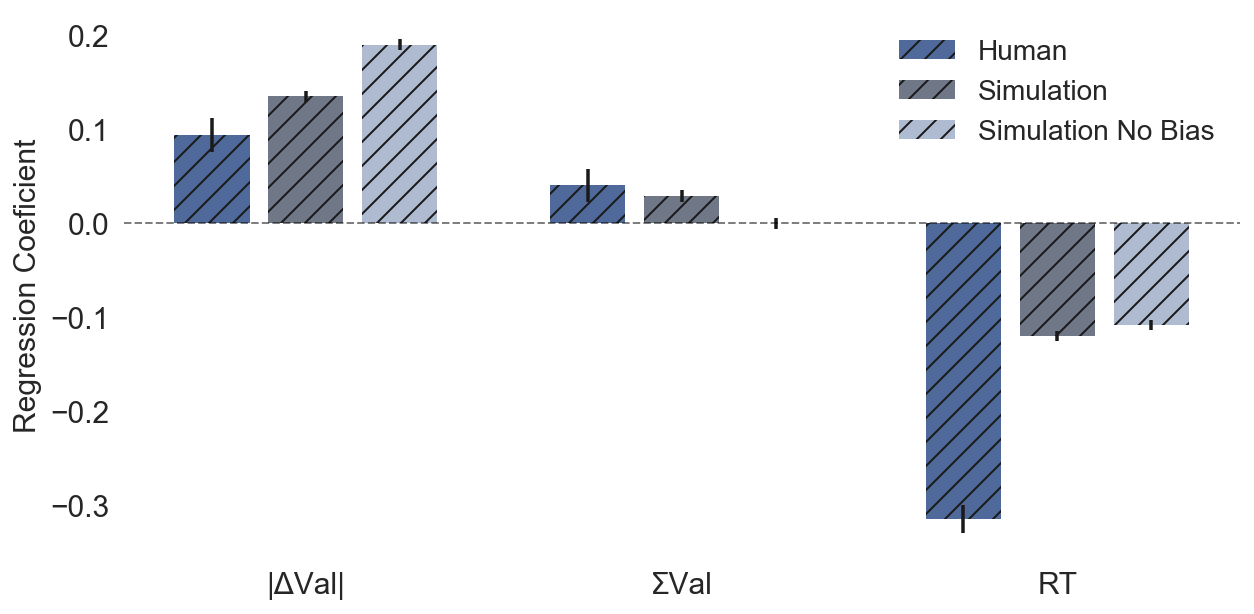

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')

width_bars = 0.2

plt.bar(x1, ModelConf_Coefs,yerr=ModelConf_SEs, color=['#4F6A9A' ],width = width_bars,hatch='//')
plt.bar(x2, ModelDev_Coefs, yerr=ModelDev_SEs,  color=['#707786' ],width = width_bars,hatch='//')
plt.bar(x3, ModelDev_nobias_Coefs,yerr=ModelDev_nobias_SEs, color=['#AFBBD1' ],width = width_bars,hatch='//')

plt.xticks(x2, ( '|ΔVal|', 'ΣVal','RT'),fontsize=15)
#plt.ylim(950, 1200)
#plt.ylabel('Regression Coeficient')

Sim_patch = mpatches.Patch(facecolor='#707786', label='Simulation',hatch='//')
Sim_nb_patch = mpatches.Patch(facecolor='#AFBBD1', label='Simulation No Bias',hatch='//')
Hum_patch = mpatches.Patch(facecolor='#4F6A9A', label='Human',hatch='//')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=15)
leg = plt.legend(handles=[Hum_patch,Sim_patch,Sim_nb_patch],fontsize=14)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)

#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

plt.show()
fig.savefig(str('SavedFigures/GLAM_individual_More_BalanceEvidence_TotVal_exclGlam.png'), dpi = 200 )

### Extracting params only for TotVal

In [38]:
ModelDev_Coefs_TotVal = ModelDev_Coefs[1]
ModelDev_nobias_Coefs_TotVal = ModelDev_nobias_Coefs[1]
ModelConf_Coefs_TotVal = ModelConf_Coefs[1]

ModelDev_SEs_TotVal = ModelDev_SEs[1] 
ModelDev_nobias_SEs_TotVal = ModelDev_nobias_SEs[1]
ModelConf_SEs_TotVal = ModelConf_SEs[1]

ModelDev_ps_TotVal = ModelDev_ps[1] 
ModelDev_nobias_ps_TotVal = ModelDev_nobias_ps[1] 
ModelConf_ps_TotVal = ModelConf_ps[1]

# put everything in a vector 
More_ModelDev_c_TotVal = [ModelDev_Coefs_TotVal,ModelDev_SEs_TotVal,ModelDev_ps_TotVal]
More_ModelDev_nobias_c_TotVal = [ModelDev_nobias_Coefs_TotVal,ModelDev_nobias_SEs_TotVal,ModelDev_nobias_ps_TotVal]
More_ModelConf_Coefs_TotVal = [ModelConf_Coefs_TotVal,ModelConf_SEs_TotVal,ModelConf_ps_TotVal]

## For LESS frame

In [39]:
%%R -i data_simulation_less  -i data_all2 -i data_simulation_less_nobias

d_sim <- data_simulation_less
d_sim_nobias <- data_simulation_less_nobias
d_hum <- data_all2

BIC: 93605.71  BIC: 93126.68  BIC: 93126.68
Call:  glm(formula = zConf ~ zAbsDVal + zTotVal + zRT, data = d_hum)

Coefficients:
(Intercept)     zAbsDVal      zTotVal          zRT  
    -0.1263       0.1621      -0.1668      -0.3065  

Degrees of Freedom: 3359 Total (i.e. Null);  3356 Residual
Null Deviance:	    3565 
Residual Deviance: 3138 	AIC: 9315


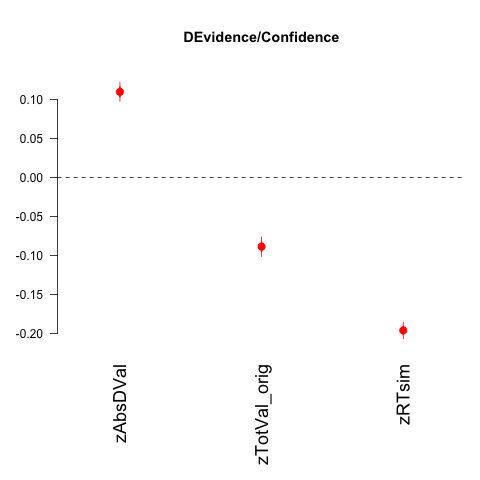

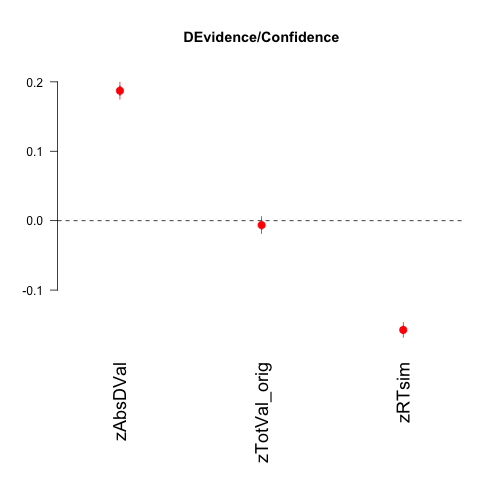

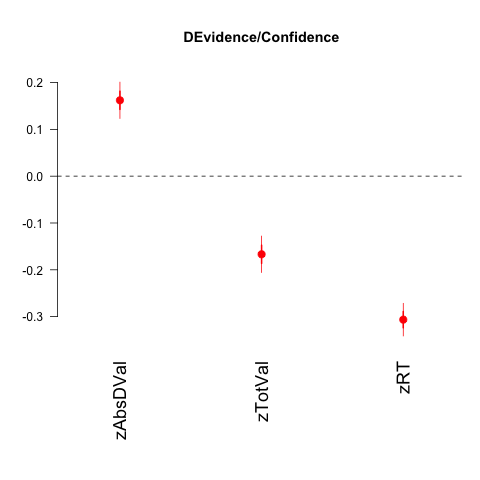

In [40]:
%%R    
title_plot = "DEvidence/Confidence"
ModelDev <- glm(zAbsDEv ~ zAbsDVal + zTotVal_orig + zRTsim  , data= d_sim)
coefplot(ModelDev,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelDev_nobias <- glm(zAbsDEv ~ zAbsDVal + zTotVal_orig + zRTsim  , data= d_sim_nobias)
coefplot(ModelDev_nobias,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

ModelConf <- glm(zConf ~ zAbsDVal + zTotVal + zRT  , data= d_hum)
coefplot(ModelConf,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),main=title_plot)

BIC1choice = BIC(ModelDev)
cat("BIC:" , BIC1choice," ")
ModelDev

BIC1choice = BIC(ModelDev_nobias)
cat("BIC:" , BIC1choice," ")
ModelDev_nobias

IC1choice = BIC(ModelConf)
cat("BIC:" , BIC1choice)
ModelConf

In [41]:
%%R
summary(ModelDev_nobias)$coefficients

                  Estimate  Std. Error       t value      Pr(>|t|)
(Intercept)  -7.439067e-17 0.005273919 -1.410539e-14  1.000000e+00
zAbsDVal      1.872230e-01 0.006127074  3.055668e+01 2.728849e-202
zTotVal_orig -6.333107e-03 0.006095898 -1.038913e+00  2.988527e-01
zRTsim       -1.574493e-01 0.005311362 -2.964386e+01 1.169564e-190


In [42]:
%%R
summary(ModelDev)$coefficients

                  Estimate  Std. Error       t value      Pr(>|t|)
(Intercept)   2.447328e-16 0.005311649  4.607473e-14  1.000000e+00
zAbsDVal      1.098650e-01 0.006160613  1.783346e+01  8.248644e-71
zTotVal_orig -8.868578e-02 0.006155178 -1.440832e+01  6.332700e-47
zRTsim       -1.960484e-01 0.005333112 -3.676060e+01 4.493087e-290


In [43]:
%%R    
# Extract Coefficients
ModelDev_Coef = summary(ModelDev)$coefficients[2:4,1]
ModelDev_nobias_Coef = summary(ModelDev_nobias)$coefficients[2:4,1]
ModelConf_Coef = summary(ModelConf)$coefficients[2:4,1]

# Extract Standard Error
ModelDev_SE = summary(ModelDev)$coefficients[2:4,2]
ModelDev_nobias_SE = summary(ModelDev_nobias)$coefficients[2:4,2]
ModelConf_SE = summary(ModelConf)$coefficients[2:4,2]

# Extract p-value
ModelDev_p = summary(ModelDev)$coefficients[2:4,4]
ModelDev_nobias_p = summary(ModelDev_nobias)$coefficients[2:4,4]
ModelConf_p = summary(ModelConf)$coefficients[2:4,4]

In [44]:
%R -o ModelDev_Coef  -o ModelDev_nobias_Coef -o ModelConf_Coef 
ModelDev_Coefs = ModelDev_Coef
ModelDev_nobias_Coefs = ModelDev_nobias_Coef
ModelConf_Coefs = ModelConf_Coef

In [45]:
%R -o ModelDev_SE  -o ModelDev_nobias_SE -o ModelConf_SE 
ModelDev_SEs = ModelDev_SE
ModelDev_nobias_SEs = ModelDev_nobias_SE
ModelConf_SEs = ModelConf_SE

In [46]:
%R -o ModelDev_p  -o ModelDev_nobias_p -o ModelConf_p 
ModelDev_ps = ModelDev_p
ModelDev_nobias_ps = ModelDev_nobias_p
ModelConf_ps = ModelConf_p

In [47]:
x1 = np.arange(len(ModelDev_Coefs))-.25
x2 = np.arange(len(ModelDev_Coefs))
x3 = np.arange(len(ModelDev_Coefs))+.25

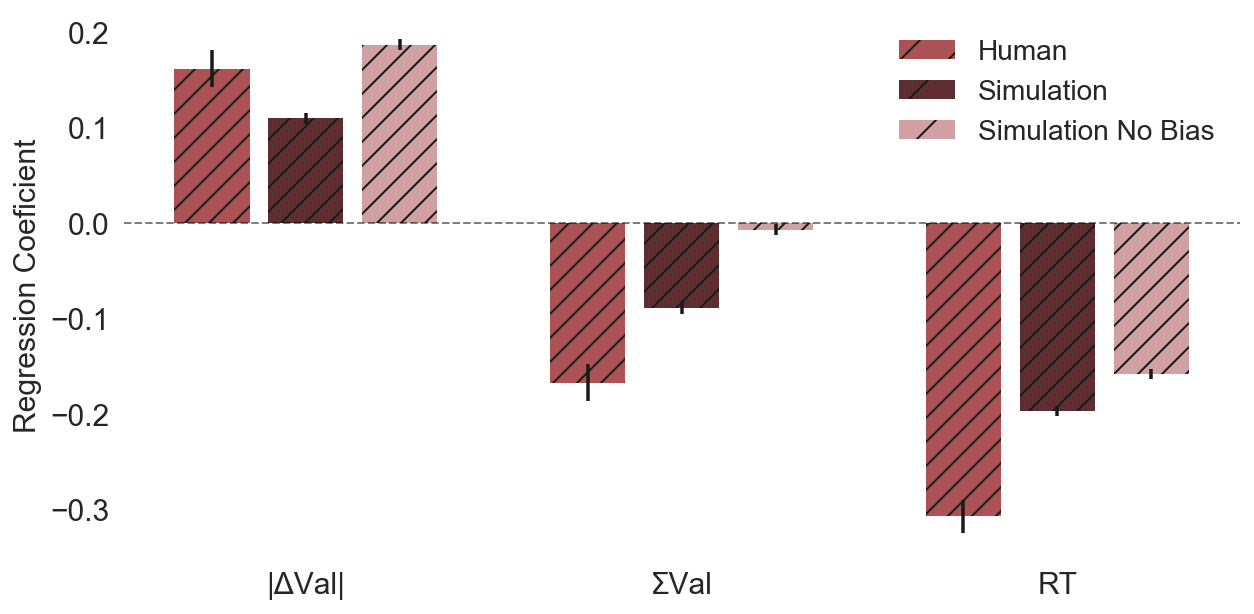

In [48]:

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')

width_bars = 0.2

plt.bar(x1, ModelConf_Coefs,yerr=ModelConf_SEs, color=['#AC5255' ],width = width_bars,hatch='//')
plt.bar(x2, ModelDev_Coefs, yerr=ModelDev_SEs,  color=['#5E2D2F' ],width = width_bars,hatch='//')
plt.bar(x3, ModelDev_nobias_Coef,yerr=ModelDev_nobias_SEs, color=['#D1A0A2' ],width = width_bars,hatch='//')

plt.xticks(x2, ( '|ΔVal|', 'ΣVal','RT'),fontsize=15)

#plt.ylim(950, 1200)



Hum_patch = mpatches.Patch(facecolor='#AC5255',hatch=r'/', label='Human')
Sim_patch = mpatches.Patch(facecolor='#5E2D2F',hatch=r'/', label='Simulation')
Sim_nb_patch = mpatches.Patch(facecolor='#D1A0A2',hatch=r'/', label='Simulation No Bias')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=15)
leg = plt.legend(handles=[Hum_patch,Sim_patch,Sim_nb_patch],fontsize=14)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)

plt.show()
fig.savefig(str('SavedFigures/GLAM_individual_Less_BalanceEvidence_TotVal_exclGlam.png'), dpi = 200 )

In [49]:
ModelDev_Coefs_TotVal = ModelDev_Coefs[1]
ModelDev_nobias_Coefs_TotVal = ModelDev_nobias_Coefs[1]
ModelConf_Coefs_TotVal = ModelConf_Coefs[1]

ModelDev_SEs_TotVal = ModelDev_SEs[1] 
ModelDev_nobias_SEs_TotVal = ModelDev_nobias_SEs[1]
ModelConf_SEs_TotVal = ModelConf_SEs[1]

ModelDev_ps_TotVal = ModelDev_ps[1] 
ModelDev_nobias_ps_TotVal = ModelDev_nobias_ps[1] 
ModelConf_ps_TotVal = ModelConf_ps[1]

# put everything in a vector 
Less_ModelDev_c_TotVal = [ModelDev_Coefs_TotVal,ModelDev_SEs_TotVal,ModelDev_ps_TotVal]
Less_ModelDev_nobias_c_TotVal = [ModelDev_nobias_Coefs_TotVal,ModelDev_nobias_SEs_TotVal,ModelDev_nobias_ps_TotVal]
Less_ModelConf_Coefs_TotVal = [ModelConf_Coefs_TotVal,ModelConf_SEs_TotVal,ModelConf_ps_TotVal]

## Plot only ToTVal

In [50]:
x11 = 1-.25
x21 = 1
x31 = 1+.25

x12 = 2-.25
x22 = 2
x32 = 2+.25

In [51]:
# Add asterisk
def add_star_indiv(x11, y_tall, err_tall):
    #plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    y_add = 0
    if (y_tall+err_tall)>0: 
        y_add = y_tall+err_tall   
    plt.text(x11, y_add + 0.02, "*", ha='center', va='bottom', color='k',fontsize=23)
    
    # Add non-significant
def add_ns_indiv(x11, y_tall, err_tall):
    #plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    y_add = 0
    if (y_tall+err_tall)>0: 
        y_add = y_tall+err_tall   
    plt.text(x11, y_add + 0.02, "n.s.", ha='center', va='bottom', color='k',fontsize=18)

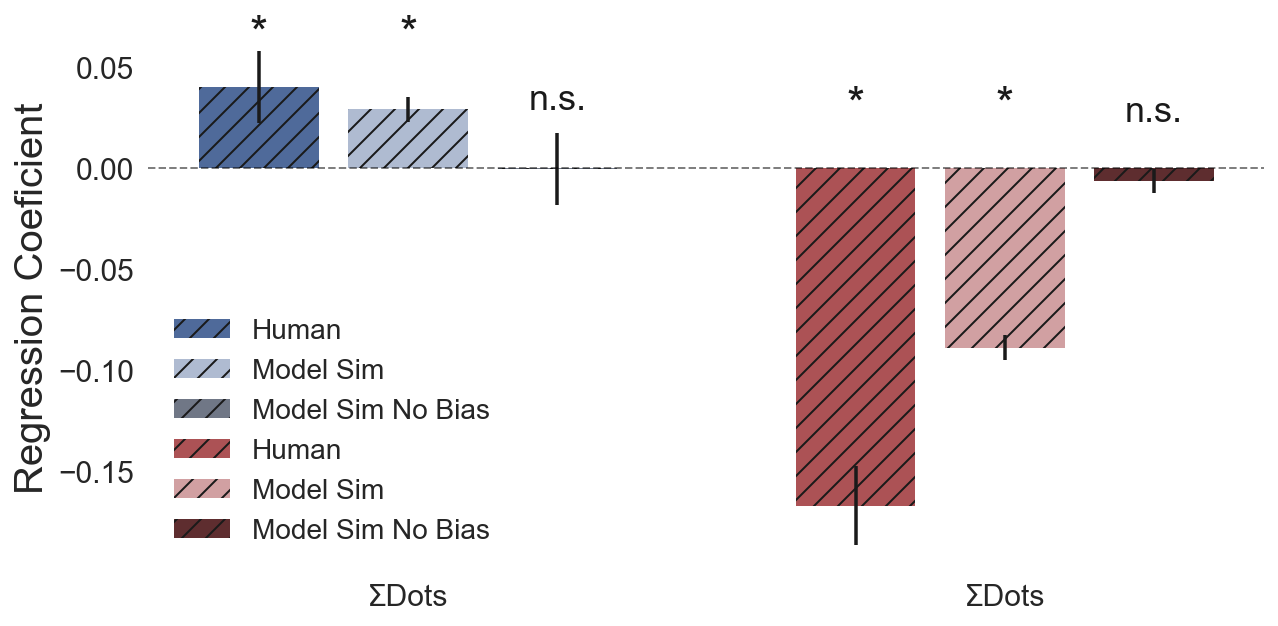

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')

width_bars = 0.2
  

plt.bar(x11, More_ModelConf_Coefs_TotVal[0], yerr=More_ModelConf_Coefs_TotVal[1], color=['#4F6A9A' ],width = width_bars,hatch='//')
plt.bar(x21, More_ModelDev_c_TotVal[0], yerr=More_ModelDev_c_TotVal[1],  color=['#AFBBD1' ],width = width_bars,hatch='//')
plt.bar(x31, More_ModelDev_nobias_c_TotVal[0], yerr=More_ModelConf_Coefs_TotVal[1], color=['#707786' ],width = width_bars,hatch='//')

plt.bar(x12, Less_ModelConf_Coefs_TotVal[0], yerr=Less_ModelConf_Coefs_TotVal[1], color=['#AC5255' ],width = width_bars,hatch='//')
plt.bar(x22, Less_ModelDev_c_TotVal[0], yerr=Less_ModelDev_c_TotVal[1],  color=['#D1A0A2' ],width = width_bars,hatch='//')
plt.bar(x32, Less_ModelDev_nobias_c_TotVal[0], yerr=Less_ModelDev_nobias_c_TotVal[1], color=['#5E2D2F' ],width = width_bars,hatch='//')


# add-stars

if More_ModelDev_c_TotVal[2]<=0.05:
    add_star_indiv(x11, More_ModelDev_c_TotVal[0], More_ModelDev_c_TotVal[1])
else:
    add_ns_indiv(x11, More_ModelDev_c_TotVal[0], More_ModelDev_c_TotVal[1])
    
if More_ModelDev_c_TotVal[2]<=0.05:
    add_star_indiv(x21, More_ModelDev_c_TotVal[0], More_ModelDev_c_TotVal[1])
else:
    add_ns_indiv(x21, More_ModelDev_c_TotVal[0], More_ModelDev_c_TotVal[1])

if More_ModelDev_nobias_c_TotVal[2]<=0.05:
    add_star_indiv(x31, More_ModelDev_nobias_c_TotVal[0], More_ModelDev_nobias_c_TotVal[1])
else:
    add_ns_indiv(x31, More_ModelDev_nobias_c_TotVal[0], More_ModelDev_nobias_c_TotVal[1])
    
    
if Less_ModelConf_Coefs_TotVal[2]<=0.05:
    add_star_indiv(x12, Less_ModelConf_Coefs_TotVal[0], Less_ModelConf_Coefs_TotVal[1])
else:
    add_ns_indiv(x12, Less_ModelConf_Coefs_TotVal[0], Less_ModelConf_Coefs_TotVal[1])

if Less_ModelDev_c_TotVal[2]<=0.05:
    add_star_indiv(x22, Less_ModelDev_c_TotVal[0], Less_ModelDev_c_TotVal[1])
else:
    add_ns_indiv(x22, Less_ModelDev_c_TotVal[0], Less_ModelDev_c_TotVal[1])

if Less_ModelDev_nobias_c_TotVal[2]<=0.05:
    add_star_indiv(x32, Less_ModelDev_nobias_c_TotVal[0], Less_ModelDev_nobias_c_TotVal[1])
else:
    add_ns_indiv(x32, Less_ModelDev_nobias_c_TotVal[0], Less_ModelDev_nobias_c_TotVal[1])    

plt.xticks([1,2], ( 'ΣDots','ΣDots'),fontsize=15)
#plt.xlim(0, 2.4)

Hum_patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'//', label='Human')
Sim_patch1 = mpatches.Patch(facecolor='#AFBBD1',hatch=r'//', label='Model Sim')
Sim_nb_patch1 = mpatches.Patch(facecolor='#707786',hatch=r'//', label='Model Sim No Bias')

Hum_patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'//', label='Human')
Sim_patch2 = mpatches.Patch(facecolor='#D1A0A2',hatch=r'//', label='Model Sim')
Sim_nb_patch2 = mpatches.Patch(facecolor='#5E2D2F',hatch=r'//', label='Model Sim No Bias')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=20
          )
leg = plt.legend(handles=[Hum_patch1,Sim_patch1,Sim_nb_patch1,Hum_patch2,Sim_patch2,Sim_nb_patch2],fontsize=14)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)

plt.show()
fig.savefig(str('SavedFigures/GLAM_individual_MoreLess_TotVal_BalanceEvidence_TotVal_exclGlam.png'), dpi = 200 )

# Load toolboxes

In [53]:
import glam
import pandas as pd
import numpy as np
import os.path
from statsmodels.stats.outliers_influence import summary_table

In [54]:
import matplotlib.pyplot as plt

from scipy.stats import invgauss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#plt.switch_backend('agg')
from scipy import stats
from scipy.stats.stats import pearsonr # Pearson's correlation
import statsmodels.api as sm

#import warnings
#warnings.filterwarnings('ignore')

In [55]:
np.random.seed(23) # from random.org

In [56]:
# For rpy2

import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice

# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [57]:
# For MacMini proper running
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [58]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    plt.show()

In [7]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [8]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

## Custom functions

In [9]:
def balance_evidence(value_tests, gaze_tests, parameters,boundary, error_weight, error_range,n_repeats):
    
    mean_rts_trials = np.zeros((value_tests.shape[0])) * np.nan
    choice_trials = np.zeros((value_tests.shape[0])) * np.nan
    DEv_trials = np.zeros((value_tests.shape[0])) * np.nan
    AbsDEv_trials = np.zeros((value_tests.shape[0])) * np.nan
    Ev_drifts_0_trials  = []
    Ev_drifts_1_trials = []

    n_trials, n_items = value_tests.shape

    running_idx_value = 0
    #we iterate for all the combinations of trials + gaze
    for trial in range(n_trials):
        
            # intialize the drifts
            evidence_drifts_0 = []
            evidence_drifts_1 = []

            #define value and gaze values for this particular trial
            value_trial =value_tests[trial]
            gaze_trial =gaze_tests[trial]
            
            Sim_value = value_trial
            Sim_gaze = gaze_trial
            
            Delta_E = np.zeros(n_repeats) * np.nan            
            AbsDelta_E = np.zeros(n_repeats) * np.nan
            rts = np.zeros(n_repeats) * np.nan
            choices = np.zeros(n_repeats) * np.nan
            trial_idx = np.zeros(n_repeats) * np.nan
            repeat_idx = np.zeros(n_repeats) * np.nan
            running_idx = 0
        
            for repeat in range(n_repeats):
                    

                    
                    Evi_0, Evi_1, choice, rt = glam.driftSim.simulate_trial_drift(parameters, value_trial, gaze_trial,
                                                boundary=boundary,
                                                error_weight=error_weight,
                                                error_range=error_range)
                    
                    Delta_E[running_idx] = Evi_1[-1] - Evi_0[-1]
                    AbsDelta_E[running_idx] = abs(Evi_0[-1] - Evi_1[-1])                        
                    rts[running_idx] = rt
                    choices[running_idx] = choice
                    trial_idx[running_idx] = trial
                    repeat_idx[running_idx] = repeat
                    # Add a new sequence of drift for this particular trial
                    evidence_drifts_0.append(Evi_0)
                    evidence_drifts_1.append(Evi_1)
                    
                    running_idx += 1
                    
               
            # Add the mean value for this parameters interation               
            mean_rts_trials [running_idx_value] = rts.mean()
            choice_trials [running_idx_value]= choices.mean() 
            DEv_trials [running_idx_value] = Delta_E.mean()
            AbsDEv_trials [running_idx_value]= AbsDelta_E.mean()
            Ev_drifts_0_trials.append(evidence_drifts_0)
            Ev_drifts_1_trials.append(evidence_drifts_1)
 
            running_idx_value += 1 

    return AbsDEv_trials,mean_rts_trials,Ev_drifts_0_trials,Ev_drifts_1_trials,choice_trials

In [10]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

    
        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [11]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    plt.show()

In [12]:
def add_difficulty(df):
    """
    Compute trial difficulties and add to DataFrame.

    Maximum value -  other values.
    In the binary case, this reduces to abs(v0 - v1).

    Parameters
    ----------
    df :      <pandas DataFrame>
              Trial wise DataFrame containing columns for item_value_i
    """

    values = df[['LVal','RVal']].values
    values_sorted = np.sort(values, axis=1)
    difficulty = values_sorted[:, -1] - np.mean(values_sorted[:, :-1], axis=1)

    levels =  (np.max(difficulty) - np.min(difficulty))/10

    lev_label = np.arange(np.min(difficulty), np.max(difficulty) + levels,levels) 
    
    difficulty2= []
    for i in range(len(difficulty)):
         difficulty2.append( lev_label[ int(difficulty[i]//levels)] )
     
    difficulty = difficulty2
    
    df['difficulty'] = np.around(difficulty, decimals = 0)
    df['difficulty'] = difficulty
    
    return df.copy()

In [13]:
def plot_DEv_Conf(data, ax=None, xlims=(0, 10), xlabel_skip=2,color1 = '#4F6A9A'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 15))
        # Set seaborn style for the plot
        sns.set(style='white')

    df = data.copy()

    # Compute relevant variables
    df = add_difficulty(df)
    
    
    # select data to use
    
    data_labels = ['zConf_human','zAbsDEv']
    
    for i in range(len(data_labels)):
        # Compute summary statistics
        subject_means = df.groupby(['Part', 'difficulty'])[data_labels[i]].mean()
        means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
        sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]
    
        x = np.arange(len(means))
        
        # Add labels for scatter plot of mean rt per participant
        scatter_data = subject_means.reset_index()
        x_scatter = []
        group_labels = np.sort(scatter_data.difficulty.unique())
        for ii in range(len(scatter_data.difficulty.values)):
            a = scatter_data.difficulty.values[ii]
            position_item =  x[np.where(group_labels==a)[0][0]]
            x_scatter.append(position_item) 
        ## ********    
        
        predicted = False if i == 0 else True
        
        # Colors for predicted
        c_pred = [color1,'#606060','#607681' ]
        
        if not predicted:  # plot underlying data
            ax.plot(x, means, 'o', markerfacecolor=color1, markersize = 10, fillstyle = 'full',
                    color=color1, linewidth=1)
            ax.vlines(x, means - sems, means + sems,
                      linewidth=1, color= color1)
            jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
            ax.plot(x_scatter+jittr, scatter_data[data_labels[i]].values, marker='o', ms=5, color=color1,alpha=0.3,linestyle="None")
    
        else:  # plot predictions
            ax.plot(x, means, '--o', markerfacecolor=c_pred[i],color=c_pred[i], linewidth=2.5, markersize = 10)

    #ax.set_ylim(2000, 3500)
    font_size_this = 22
    ax.set_xlabel('|ΔVal|',fontsize=font_size_this)
    ax.set_ylabel( r'zΔ$\epsilon$ / zConfidence',fontsize=font_size_this)
    ax.set_xticks(x[::xlabel_skip])
    ax.tick_params(axis = 'y',labelsize=font_size_this)
    ax.tick_params(axis = 'x',labelsize=font_size_this)

    ax.set_xticklabels(np.around(means.index.values[::xlabel_skip],decimals = 1))
    sns.despine()



In [14]:
def add_difficulty_TotVal(df,TotVal_label):
    """
    Compute trial difficulties and add to DataFrame.

    Maximum value -  other values.
    In the binary case, this reduces to abs(v0 - v1).

    Parameters
    ----------
    df :      <pandas DataFrame>
              Trial wise DataFrame containing columns for item_value_i
    """

    difficulty = df[[TotVal_label]].values

    levels =  (np.max(difficulty) - np.min(difficulty))/10

    lev_label = np.arange(np.min(difficulty), np.max(difficulty) + levels,levels) 
    
    difficulty2= []
    for i in range(len(difficulty)):
         difficulty2.append( lev_label[ int(difficulty[i]//levels)] )
     
    difficulty = difficulty2
    
    df['difficulty'] = np.around(difficulty, decimals = 0)
    df['difficulty'] = difficulty
    
    return df.copy()

In [15]:
def plot_DEv_Conf_TotVal(data, TotVal_label, ax=None, xlims=(0, 10), xlabel_skip=2,color1 = '#4F6A9A'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 15))
        # Set seaborn style for the plot
        sns.set(style='white')

    df = data.copy()

    # Compute relevant variables
    df = add_difficulty_TotVal(df,TotVal_label)
    print ('Done with TotVal')
    
    # select data to use
    
    data_labels = ['zConf_human','zAbsDEv']
    
    for i in range(len(data_labels)):
        # Compute summary statistics
        subject_means = df.groupby(['Part','difficulty'])[data_labels[i]].mean()
        means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
        sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]
    
        x = np.arange(len(means))
        
        # Add labels for scatter plot of mean rt per participant
        scatter_data = subject_means.reset_index()
        x_scatter = []
        group_labels = np.sort(scatter_data.difficulty.unique())
        for ii in range(len(scatter_data.difficulty.values)):
            a = scatter_data.difficulty.values[ii]
            position_item =  x[np.where(group_labels==a)[0][0]]
            x_scatter.append(position_item) 
        ## ********    
        
        predicted = False if i == 0 else True
        
        # Colors for predicted
        c_pred = [color1,'#606060','#607681' ]
        
        if not predicted:  # plot underlying data
            ax.plot(x, means, 'o', markerfacecolor=color1, markersize = 10, fillstyle = 'full',
                    color=color1, linewidth=1)
            ax.vlines(x, means - sems, means + sems,
                      linewidth=1, color= color1)
            jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
            ax.plot(x_scatter+jittr, scatter_data[data_labels[i]].values, marker='o', ms=5, color=color1,alpha=0.3,linestyle="None")
    
        else:  # plot predictions
            ax.plot(x, means, '--o', markerfacecolor=c_pred[i],color=c_pred[i], linewidth=2.5, markersize = 10)
    font_size_this = 22
    #ax.set_ylim(2000, 3500)
    ax.set_xlabel('|ΣVal|',fontsize=font_size_this)
    ax.set_ylabel( r'zΔ$\epsilon$ / zConfidence',fontsize=font_size_this)
    ax.set_xticks(x[::xlabel_skip])
    ax.tick_params(axis = 'y',labelsize=font_size_this)
    ax.tick_params(axis = 'x',labelsize=font_size_this)
    ax.set_xticklabels(np.around(means.index.values[::xlabel_skip],decimals = 1))
    sns.despine()


In [16]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in data_exp1["Part"].unique():
            median_matrix_aux=[]
    
            for j in data_exp1["BlockCond"].unique():
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['Part'] == i]
                Splitdata = Splitdata.loc[Splitdata['BlockCond'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['TrialN',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols